In [47]:
from pylab import*

## Ejercicio 3

3 . Modifique las funciones integradoras en el problema 1 de tal manera que se puedan pasar argumentos opcionales al sistema de ecuaciones diferenciales de tal manera que se puedan modificar parametros al momento de hacer la integración. Una vez hecho esto, obtenga la solución de la siguiente ecuación diferencial:
$$
\ddot{x}+\frac{1}{10}\dot{x}+4\sin(x) = \frac{1}{2}\sin(\omega t)
$$
Con condiciones iniciales $\dot{x}(0)=1$ y $x(0)=0$ para $\omega=\{1,1.1,1.2,1.3, ..., 2.9 ,3\}$. Realice la gráfica de algunas soluciones que representen el comportamientod e la solución en función de $\omega$ y explique su resultado.

Bueno, algo que hemos aprendido en estos dos incisos, es que solo debemos darle de comer el sistema de ecuaciones, el conjunto de condiciones inciales.
Considero que el ejercicio es muy similar al del examen, en donde teniamos que modificar el valor de la función dada, solo que no logre darme cuenta como terminarlo, lit cuando salí del examen, mi compañero me dijo como lo hizo y solo era meter la función en cuestión al algoritmo.
Comenzare con algo asi, y si no funciona bueno, ahorita intento otra cosa.


In [48]:
#Considero que no es importante incluir todo el tedioso procedimiento para preparar la función y las condiones iniciales, ya que es el mismo que en el ejercicio 2, por lo que solo incluiré la función y las condiciones iniciales inciales
def f(t, x,omega):
    x1, x2 = x
    return array([x2, -0.1*x2 - 4*sin(x1) + 0.5*sin(omega*t)])

t = linspace(0, 10, 100)
x0 = array([0, 1]) 

### Euler

In [49]:
def eulerV20MODEADA(f, x0, t, omega):
    x = [x0] #lista de valores de x
    h = t[1] - t[0] # paso
    for i in range(0, len(t)-1): 
        x0 = x0 + h * f(t[i], x0, omega)
        x.append(x0)
    return array(x)

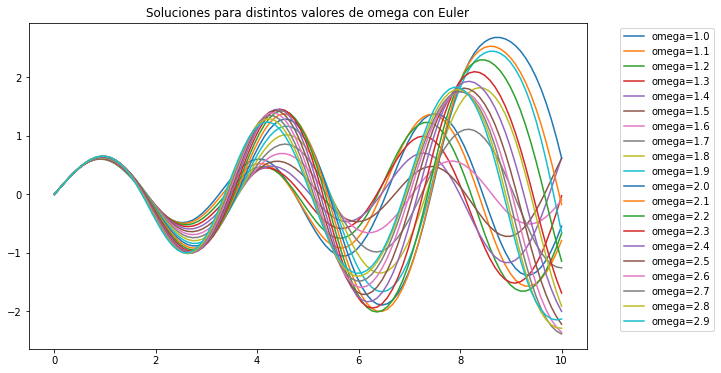

In [50]:
figure(figsize=(10, 6))

for omega in arange(1, 3, 0.1):
    X = eulerV20MODEADA(f, x0, t, omega)
    plt.plot(t, X[:, 0], label=f'omega={omega:.1f}')
    
legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
title('Soluciones para distintos valores de omega con Euler')
show()

### Taylor 2

Simplemente basa ahora con definir a Fy y ya.

In [51]:
def fy(t, x,omega):
    x1, x2 = x
    return array([[0, 1], [-4 * cos(x1), -0.1]])

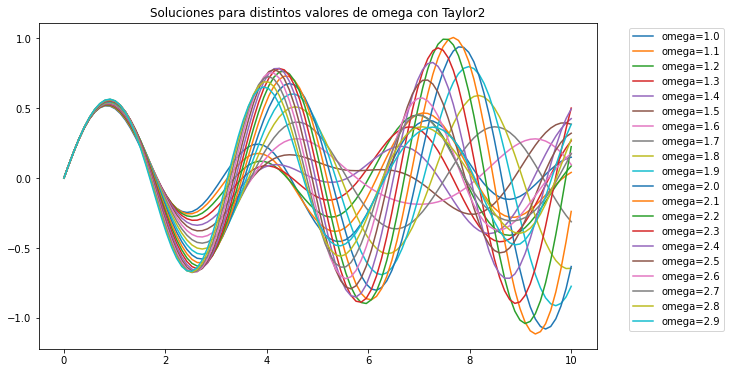

In [52]:
def Taylor2V20MODEADA(F, Fy, u0, t,omega):
    n = len(u0)
    u = zeros((len(t), n))
    u[0] = u0
    h = t[1] - t[0]
    for i in range(0, len(t) - 1):
        k1 = F(t[i], u[i],omega)
        k2 = dot(Fy(t[i], u[i],omega), k1)
        u[i+1] = u[i] + h * k1 + 0.5 * h**2 * k2
    return u

figure(figsize=(10, 6))

for omega in arange(1, 3, 0.1):
    X = Taylor2V20MODEADA(f,fy, x0, t, omega)
    plot(t, X[:, 0], label=f'omega={omega:.1f}')
    
legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
title('Soluciones para distintos valores de omega con Taylor2')
show()

Resulta que no era una maniobra tan brusca, solo fue incluir a omega como un argumento que se le daba a f una vez que RK4 y RK2 la usaba.

### Runge-Kutta 2

In [53]:
def rk2SYSMODEADA(f, U0, t, omega):
    n = len(t)
    U = [U0]
    h = t[1] - t[0]
    for i in range(n-1):
        k1 = h * f(t[i], U[i], omega)
        k2 = h * f(t[i] + h, U[i] + k1, omega)
        U.append(U[i] + 0.5 * (k1 + k2))
    return array(U)



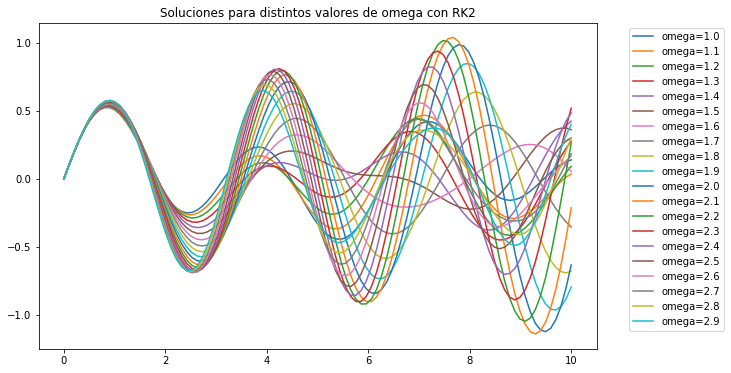

In [54]:
figure(figsize=(10, 6))

for omega in arange(1, 3, 0.1):
    X = rk2SYSMODEADA(f, x0, t, omega)
    plt.plot(t, X[:, 0], label=f'omega={omega:.1f}')
    
legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
title('Soluciones para distintos valores de omega con RK2')
show()

### Runge Kutta 4

In [55]:
def rk4SYSMODEADA(f, U0, t, omega):
    n = len(t)
    U = [U0]
    h = t[1] - t[0]
    for i in range(n-1):
        k1 = h * f(t[i], U[i], omega)
        k2 = h * f(t[i] + 0.5*h, U[i] + 0.5*k1, omega)
        k3 = h * f(t[i] + 0.5*h, U[i] + 0.5*k2, omega)
        k4 = h * f(t[i+1], U[i] + k3, omega)
        U.append(U[i] + (k1 + 2*k2 + 2*k3 + k4)/6)
    return array(U)

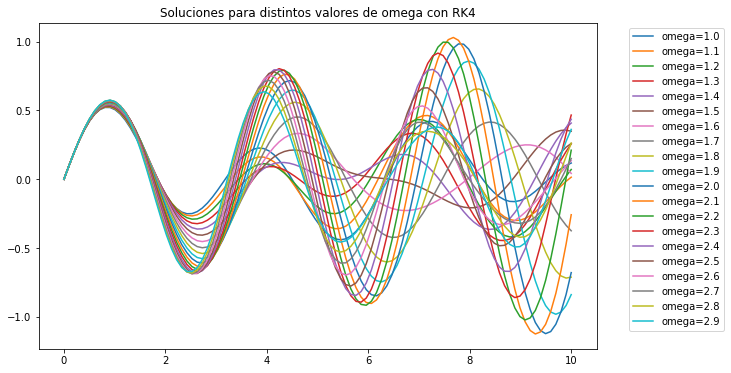

In [56]:
figure(figsize=(10, 6))

for omega in arange(1, 3, 0.1):
    X = rk4SYSMODEADA(f, x0, t, omega)
    plt.plot(t, X[:, 0], label=f'omega={omega:.1f}')
    
legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
title('Soluciones para distintos valores de omega con RK4')
show()